**Machine Learning Project**

Sum up of the project

Can we predict the risk of developing a tumor based on an individual’s symptoms? We aim to design a simple artificial intelligence system that determines whether a patient should be concerned given their observed symptoms. Using Python and basic machine learning tools, we will train a supervised classification model on a disease–symptom dataset.

*The data*

We use Disease-Symptom Dataset under World Bank license and found in https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset. This dataset could not be used in a real research project, but is relevant for a project aimed at manipulating and understanding machine learning. It contains a list of 773 unique diseases associated with 377 symptoms. Theses symptoms are coded as dummy variable: 1 if the symptom is relevant to the disease, 0 otherwise. We end up with 246,000 samples.

**Taking a look at the data**

In [2]:
import pandas as pd

df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

# Je crée un sample pour que ça tourne plus vite
df_sample = df.sample(1000).copy()
df.sample(30)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
23287,stroke,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51696,hypoglycemia,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
99993,itching of unknown cause,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202497,hyperemesis gravidarum,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35171,chronic obstructive pulmonary disease (copd),0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
115878,intracerebral hemorrhage,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104918,alcohol withdrawal,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123754,obstructive sleep apnea (osa),0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
202304,hyperemesis gravidarum,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125955,cervicitis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(246945, 378)

There are 246,945 observations for 378 variables. We need to clean this a bit to make it more useful and relevant.

In [4]:
df.dtypes

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object

In [5]:
df.describe()

,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
count,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,246945.000000,...,246945.0,246945.0,246945.0,246945.0,246945.000000,246945.0,246945.0,246945.0,246945.000000,246945.0
mean,0.039235,0.042746,0.086440,0.061001,0.097252,0.069943,0.039410,0.040572,0.037871,0.024876,...,0.0,0.0,0.0,0.0,0.001385,0.0,0.0,0.0,0.000073,0.0
std,0.194155,0.202285,0.281014,0.239333,0.296302,0.255051,0.194568,0.197296,0.190884,0.155747,...,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.008537,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0


In [6]:
# Let's take a look at the number of diseases we have:
len(df["diseases"].unique())
# There are 773 of them, let's take a look some of them:
for disease in df_sample["diseases"].unique():
    print(f"number of {disease}: {df_sample["diseases"].value_counts()[disease]}")
# Some are numerous, others are few

number of intestinal obstruction: 2
number of injury to the shoulder: 1
number of gout: 6
number of complex regional pain syndrome: 8
number of fracture of the facial bones: 2
number of drug reaction: 4
number of chronic obstructive pulmonary disease (copd): 4
number of smoking or tobacco addiction: 3
number of transient ischemic attack: 1
number of bladder obstruction: 2
number of ischemic heart disease: 5
number of tinnitus of unknown cause: 3
number of strep throat: 8
number of liver disease: 7
number of impetigo: 2
number of osteoarthritis: 3
number of stress incontinence: 2
number of fracture of the rib: 2
number of injury to the arm: 6
number of developmental disability: 8
number of obstructive sleep apnea (osa): 5
number of missed abortion: 2
number of idiopathic excessive menstruation: 5
number of ear wax impaction: 4
number of sepsis: 6
number of chronic glaucoma: 1
number of anemia due to chronic kidney disease: 1
number of herpangina: 3
number of concussion: 6
number of seba

**Pre-processing**

Due to our poor skills in medicine, and to improve both efficiency and relevance, we will use an AI to store the diseases into larger, more comprehensive categories. We will ask it to do it just as we saw in class, with a "if ... in disease... yada yada".

In [7]:
def group_disease(disease):
    disease = disease.lower()
    
    # Maladies cardiovasculaires
    if any(x in disease for x in ["heart", "coronary", "hypertension", "cardiomyopathy", "aortic", "stroke", "ischemia", "atrial", "valve", "arrhythmia", "thrombosis", "embolism", "angina", "arterial", "vascular"]):
        return "cardiovascular"
    
    # Maladies respiratoires
    elif any(x in disease for x in ["asthma", "copd", "emphysema", "pulmonary", "bronchiolitis", "respiratory", "pneumonia", "bronchitis", "breath", "lung", "tracheal", "laryngeal", "pleural", "pneumothorax"]):
        return "respiratory"
    
    # Maladies métaboliques / endocriniennes
    elif any(x in disease for x in ["diabetes", "thyroid", "obesity", "metabolic", "hypoglycemia", "hyperglycemia", "parathyroid", "pituitary", "adrenal", "hormone", "cushing", "graves", "hashimoto"]):
        return "metabolic_endocrine"
    
    # Maladies neurologiques / mentales
    elif any(x in disease for x in ["depression", "anxiety", "parkinson", "dementia", "adhd", "migraine", "epilepsy", "neuropathy", "stroke", "disorder", "bipolar", "schizophrenia", "psychotic", "panic", "ptsd", "traumatic", "stress", "mental", "neurological", "brain", "alzheimer", "huntington", "als", "sclerosis", "palsy", "nerve"]):
        return "neurological_psych"
    
    # Maladies digestives / hépatiques
    elif any(x in disease for x in ["liver", "gastro", "pancreatitis", "esophagus", "stomach", "intestinal", "ulcer", "nash", "hepatitis", "crohn", "colitis", "ibs", "diverticular", "cirrhosis", "cholecyst", "bile", "bowel"]):
        return "digestive_hepatic"
    
    # Maladies rénales / urologiques
    elif any(x in disease for x in ["kidney", "renal", "urethral", "bladder", "prostate", "urine", "urinary", "urologic", "uric", "urea"]):
        return "renal_urological"
    
    # Maladies infectieuses
    elif any(x in disease for x in ["infection", "viral", "bacterial", "fungal", "dengue", "hiv", "malaria", "tuberculosis", "meningitis", "sepsis", "pneumonia", "hepatitis", "herpes", "gonorrhea", "chlamydia", "syphilis", "lyme", "fever", "cold", "flu", "wart", "lice", "scabies"]):
        return "infectious"
    
    # Maladies musculo-squelettiques
    elif any(x in disease for x in ["fracture", "injury", "arthritis", "osteoporosis", "spine", "knee", "shoulder", "ankle", "foot", "hip", "bone", "cartilage", "tendon", "ligament", "muscle", "sprain", "strain", "dislocation", "bursitis", "carpal tunnel"]):
        return "musculoskeletal"
    
    # Maladies dermatologiques
    elif any(x in disease for x in ["skin", "dermatitis", "eczema", "psoriasis", "rash", "acne", "wound", "burn", "ulcer", "sore", "wart", "fungal", "abscess", "cyst", "mole", "lesion", "blister", "impetigo"]):
        return "dermatological"
    
    # Maladies oncologiques
    elif any(x in disease for x in ["cancer", "tumor", "carcinoma", "lymphoma", "sarcoma", "leukemia", "malignant", "ependymoma", "meningioma", "adenoma", "polyp"]):
        return "oncology"
    
    # Maladies gynécologiques / obstétriques
    elif any(x in disease for x in ["pregnancy", "uterine", "ovarian", "endometriosis", "fibroids", "menopause", "vagina", "placenta", "cervix", "womb", "female", "gynecolog", "obstetric", "natal", "abortion", "ectopic", "preeclamp"]):
        return "gynecological_obstetric"
    
    # Maladies ophtalmologiques / auditives
    elif any(x in disease for x in ["eye", "glaucoma", "retina", "vision", "hearing", "tinnitus", "otitis", "ocular", "conjunctivitis", "cataract", "cornea", "optic", "visual", "deaf", "ear", "auditory"]):
        return "ophthalmology_audiology"
    
    # Maladies hématologiques / immunologiques
    elif any(x in disease for x in ["anemia", "bleeding", "coagulation", "immunodeficiency", "leukemia", "lymphoma", "sickle", "hemophil", "thrombocyt", "polycyth"]):
        return "hematological_immunological"
    
    # Autres / non classés
    else:
        return "other"

df["group diseases"] = df["diseases"].apply(group_disease)
#df_sample["group diseases"] = df["diseases"].apply(group_disease)

# In case here is the list of the above grouped categories:
#["cardiovascular", "respiratory", "metabolic_endocrine", "neurological_psych", "digestive_hepatic", "renal_urological", "infectious", "musculoskeletal", "dermatological", "oncology", "gynecological_obstetric", "ophthalmology_audiology", "hematological_immunological", "other"]

Now that we have grouped many of them, let's take some time to look at them again: 

In [8]:
df.head(10).style

for disease in df["group diseases"].unique():
    print(f"number of {disease}: {df["group diseases"].value_counts()[disease]}")

number of neurological_psych: 29611
number of oncology: 2162
number of other: 104838
number of musculoskeletal: 17141
number of dermatological: 16460
number of metabolic_endocrine: 2078
number of ophthalmology_audiology: 13379
number of gynecological_obstetric: 6289
number of digestive_hepatic: 12872
number of cardiovascular: 11142
number of respiratory: 8220
number of hematological_immunological: 2635
number of infectious: 14021
number of renal_urological: 6097


Should we remove all the other category? I think so, as they are not relevant to compute our tumor, but we will see that.

Now, lets turn to our features: the symptoms. They may be too numerous. The IA mention doing a variance threshold method, I look at the documentation on the Internet and try to apply it with the help of the AI.
For the AI, a threshold of 0.01 or 0.05 seem relevant. In any case, the goal is to remove features that are too constant between diseases to be relevant; they do not allow to differentiate between disease

In [9]:
from sklearn.feature_selection import VarianceThreshold
# First, let's identify which columns are symptom features (not metadata)
# Assuming 'diseases' and 'group diseases' are the target/metadata columns

symptom_columns = [col for col in df.columns if col not in ['diseases', 'group diseases']]
X = df[symptom_columns]

print(f"Initial number of symptoms: {len(symptom_columns)}")
print(f"Dataset shape: {X.shape}")

# Apply Variance Threshold
# For binary features (0/1), threshold is based on Var(X) = p(1-p)
# threshold=0.01 removes features that appear in less than ~1% or more than ~99% of cases
selector = VarianceThreshold(threshold=0.01)
X_filtered = selector.fit_transform(X)

# Get the names of selected features
selected_features = X.columns[selector.get_support()].tolist()
removed_features = X.columns[~selector.get_support()].tolist()

print(f"\nAfter variance threshold (0.01):")
print(f"Number of symptoms remaining: {len(selected_features)}")
print(f"Number of symptoms removed: {len(removed_features)}")
print(f"New shape: {X_filtered.shape}")

# Show some removed features (the ones with very low variance)
print(f"\nSample of removed symptoms (low variance):")
print(removed_features[:10])


Initial number of symptoms: 377
Dataset shape: (246945, 377)

After variance threshold (0.01):
Number of symptoms remaining: 146
Number of symptoms removed: 231
New shape: (246945, 146)

Sample of removed symptoms (low variance):
['breathing fast', 'throat swelling', 'lump in throat', 'throat feels tight', 'groin mass', 'emotional symptoms', 'elbow weakness', 'back weakness', 'pus in sputum', 'symptoms of the scrotum and testes']


In [10]:
# Create a new dataframe with only selected symptoms + target/metadata columns
df_cleaned = df[['group diseases'] + ['diseases'] + selected_features].copy()

print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"\nCleaned dataset columns: {df_cleaned.columns.tolist()[:10]}... (showing first 10)")

# You can adjust the threshold if needed:
# threshold=0.001 -> removes very rare symptoms (stricter)
# threshold=0.05  -> removes more symptoms (less strict)
# threshold=0.0   -> keeps all features with any variance


Cleaned dataset shape: (246945, 148)

Cleaned dataset columns: ['group diseases', 'diseases', 'anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements']... (showing first 10)


In [11]:
df_cleaned

,group diseases,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,...,sweating,swollen eye,symptoms of bladder,itching of skin,"skin dryness, peeling, scaliness, or roughness",skin irritation,warts,skin rash,low self-esteem,mouth pain
0,neurological_psych,panic disorder,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,neurological_psych,panic disorder,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,neurological_psych,panic disorder,1,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,neurological_psych,panic disorder,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,neurological_psych,panic disorder,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246940,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246941,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246942,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246943,dermatological,open wound of the nose,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def extract_group_int(disease:str):
    if disease == "cardiovascular":
        return 0
    elif disease == "respiratory":
        return 1
    elif disease == "metabolic_endocrine":
        return 2
    elif disease == "neurological_psych":
        return 3
    elif disease == "digestive_hepatic":
        return 4
    elif disease == "renal_urological":
        return 5
    elif disease == "infectious":
        return 6
    elif disease == "musculoskeletal":
        return 7
    elif disease == "dermatological":
        return 8
    elif disease == "oncology":
        return 9
    elif disease == "gynecological_obstetric":
        return 10
    elif disease == "ophthalmology_audiology":
        return 11
    elif disease == "hematological_immunological":
        return 12   
    elif disease == "other":
        return 13  


df_cleaned["Response"] = df_cleaned["group diseases"].apply(extract_group_int)

Now we are going to train the model, just as in the colortree exercise, to predict the disease from the syptoms. 

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Instanciate needed parameters and set the random seed to be reproductible
test_ratio = 0.2
seed_n = 42
np.random.seed(seed_n)

# Define X and Y
X = df_cleaned[[col for col in df_cleaned.columns if col not in ['group diseases']]]
Y = df_cleaned["Response"]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio, random_state=seed_n)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

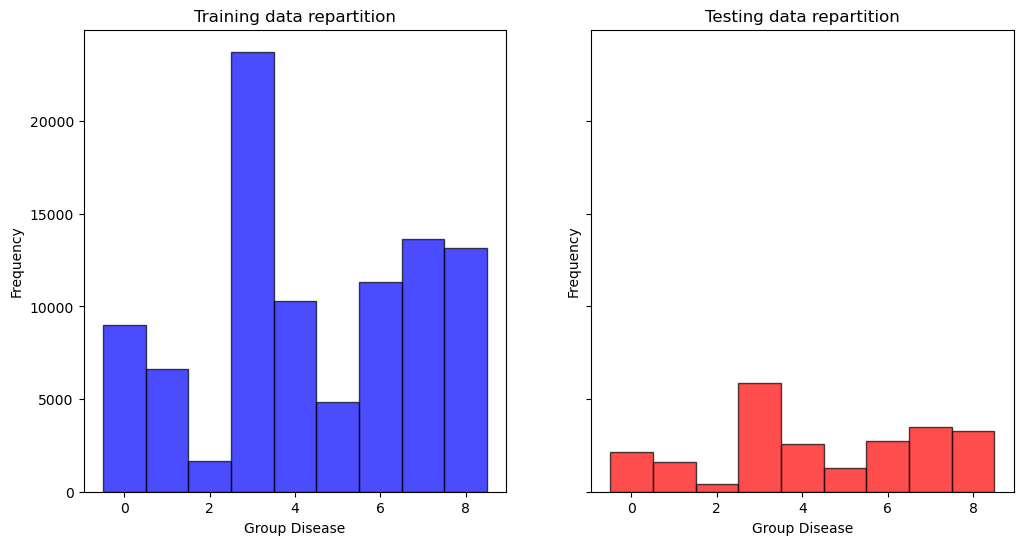

In [16]:
plt.figure()
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].hist(Y_train, bins=np.arange(0, 10) - 0.5, edgecolor="black", alpha=0.7, color="blue")
axes[1].hist(Y_test, bins = np.arange(0,10) - 0.5, edgecolor = "black", alpha = 0.7, color = "red")
axes[0].set(title='Training data repartition', ylabel='Frequency', xlabel='Group Disease')
axes[1].set(title='Testing data repartition', ylabel='Frequency', xlabel='Group Disease')
plt.show

We could play with the splitting repartition

Outline to do:
- Vary features selections and compare
- Vary models / process
- Plot nice graphs (eg confusion matrix)
- Research question?